In [1]:
import torch
from utils.func import show_gradient_maps, show_images_per_class, show_pdd_synthetic
from models.Model import ConvNet

In [2]:
# Load the distilled file
data = torch.load("data/Distilled/mm-match_mnist_['lenet'].pt", map_location=torch.device('cpu'))
X_list = data['X']   # this was your X_syn
Y_list = data['Y']   # this was your Y_syn

# Suppose we want to use the *last* stage (or pick stage i-1):
stage = 0
X_syn = X_list[stage]  # Tensor of shape [synthetic_size, C, H, W]
Y_syn = Y_list[stage]  # Tensor of shape [synthetic_size, num_classes]

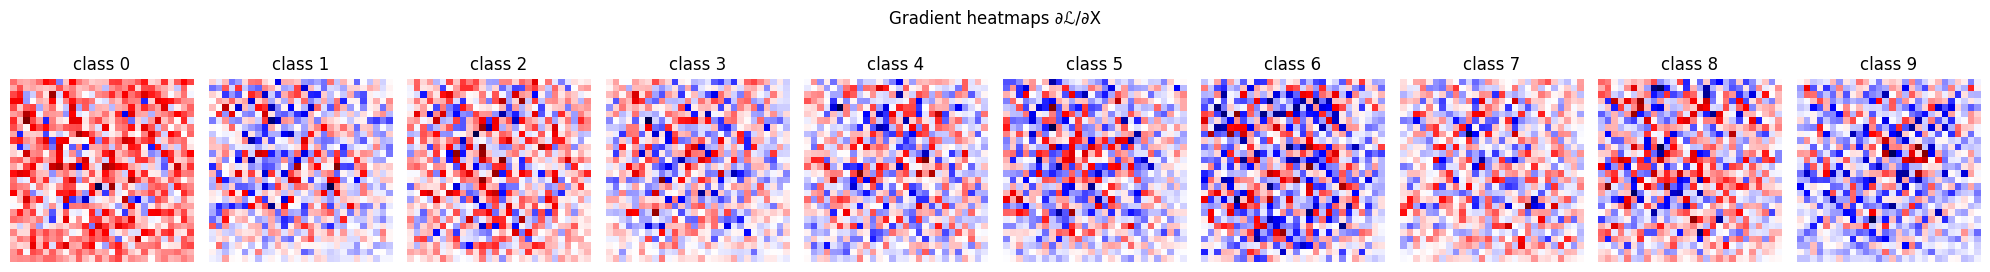

In [7]:
show_gradient_maps(ckpt_path        = "data/checkpoints/mm-match_mnist_convnet.pth",
                   model_cls        = ConvNet,
                   X_syn            = X_syn,
                   Y_syn            = Y_syn)

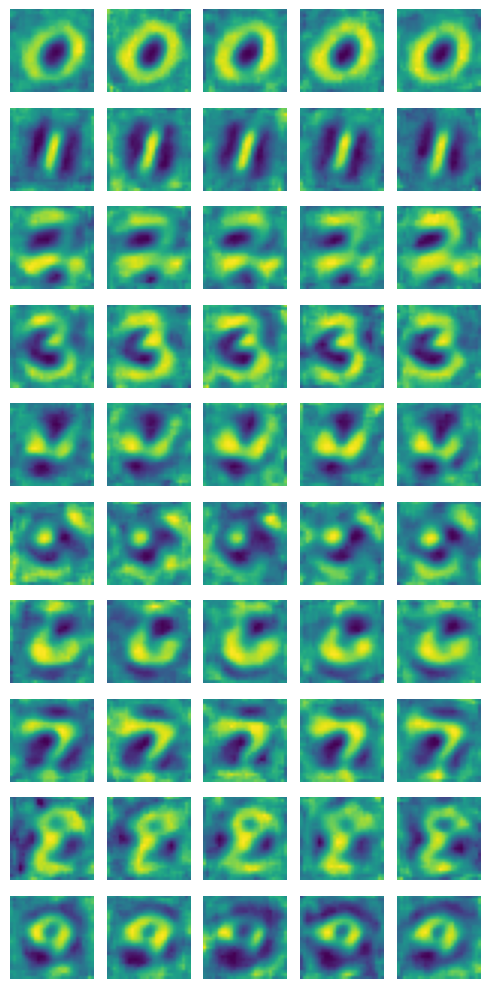

In [8]:
show_images_per_class(X_syn=X_syn, Y_syn=Y_syn, max_per_class=5, figsize_per_image=1)

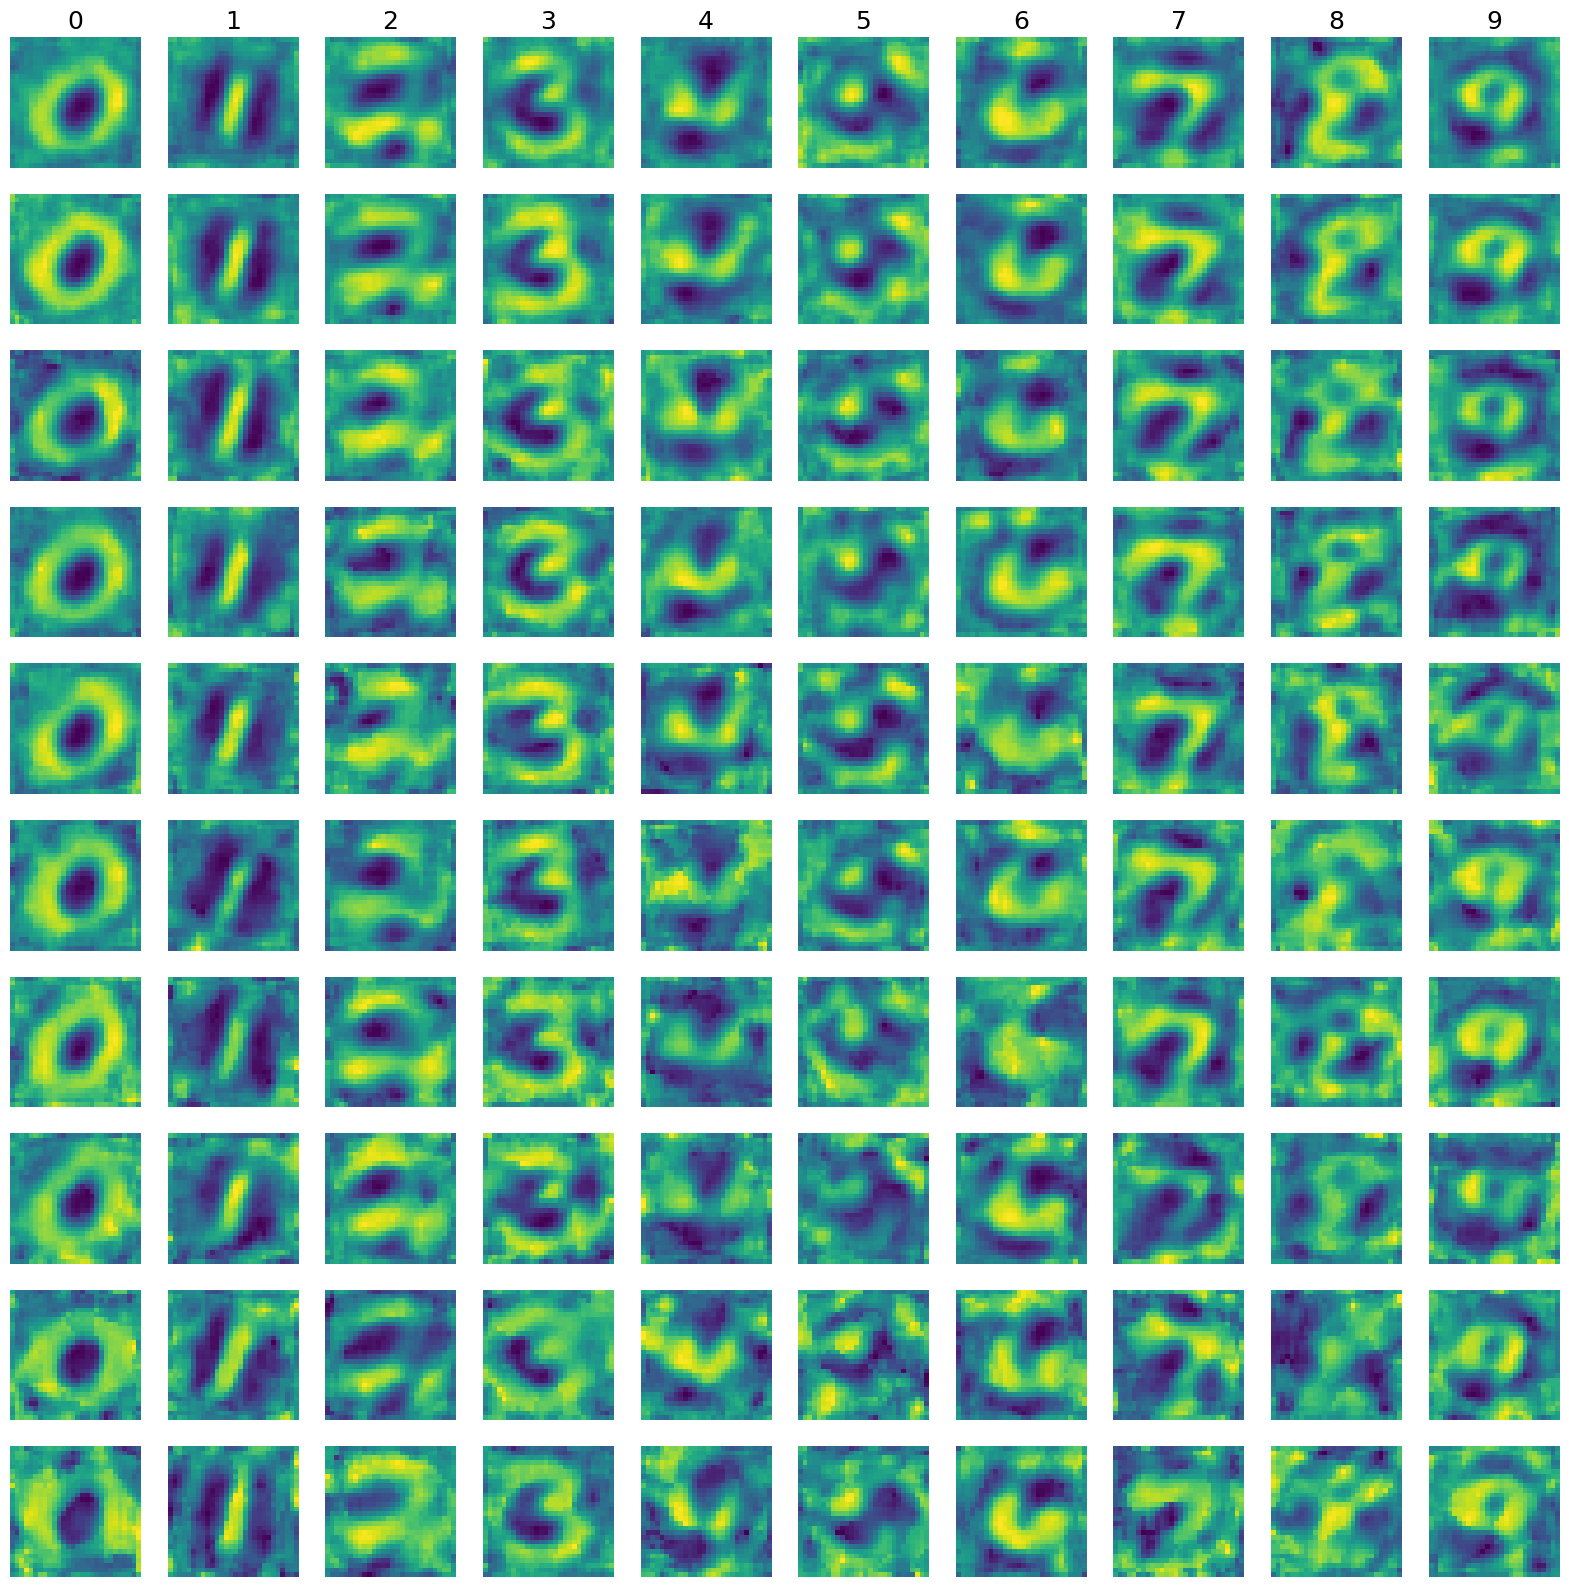

In [3]:
show_pdd_synthetic(X_stages=X_list,
                   Y_stages=Y_list,
                   stages_to_plot=[0, 1, 2, 3, 4],
                   ipc=2)